In [72]:
import pandas as pd

# Load datasets
ev_pollution_data = pd.read_csv('C:/Users/user/Documents/Internship/Project Data/pollution data.csv')

In [73]:
ev_pollution_data.head(10)

,state,status,AQI-US,PM2.5,PM10,Temp,Humid
0,Andhra Pradesh,MODERATE,56,16,31,28,74
1,Arunachal Pradesh,GOOD,39,11,17,21,100
2,Assam,GOOD,46,13,20,23,98
3,Bihar,MODERATE,87,28,53,31,58
4,Chandigarh,POOR,107,38,49,25,53
5,Chhattisgarh,MODERATE,67,20,46,27,72
6,Dadra And Nagar Haveli,MODERATE,62,16,35,27,82
7,Daman And Diu,MODERATE,61,16,33,28,79
8,Delhi,POOR,108,37,113,29,58
9,Goa,GOOD,30,8,20,27,81


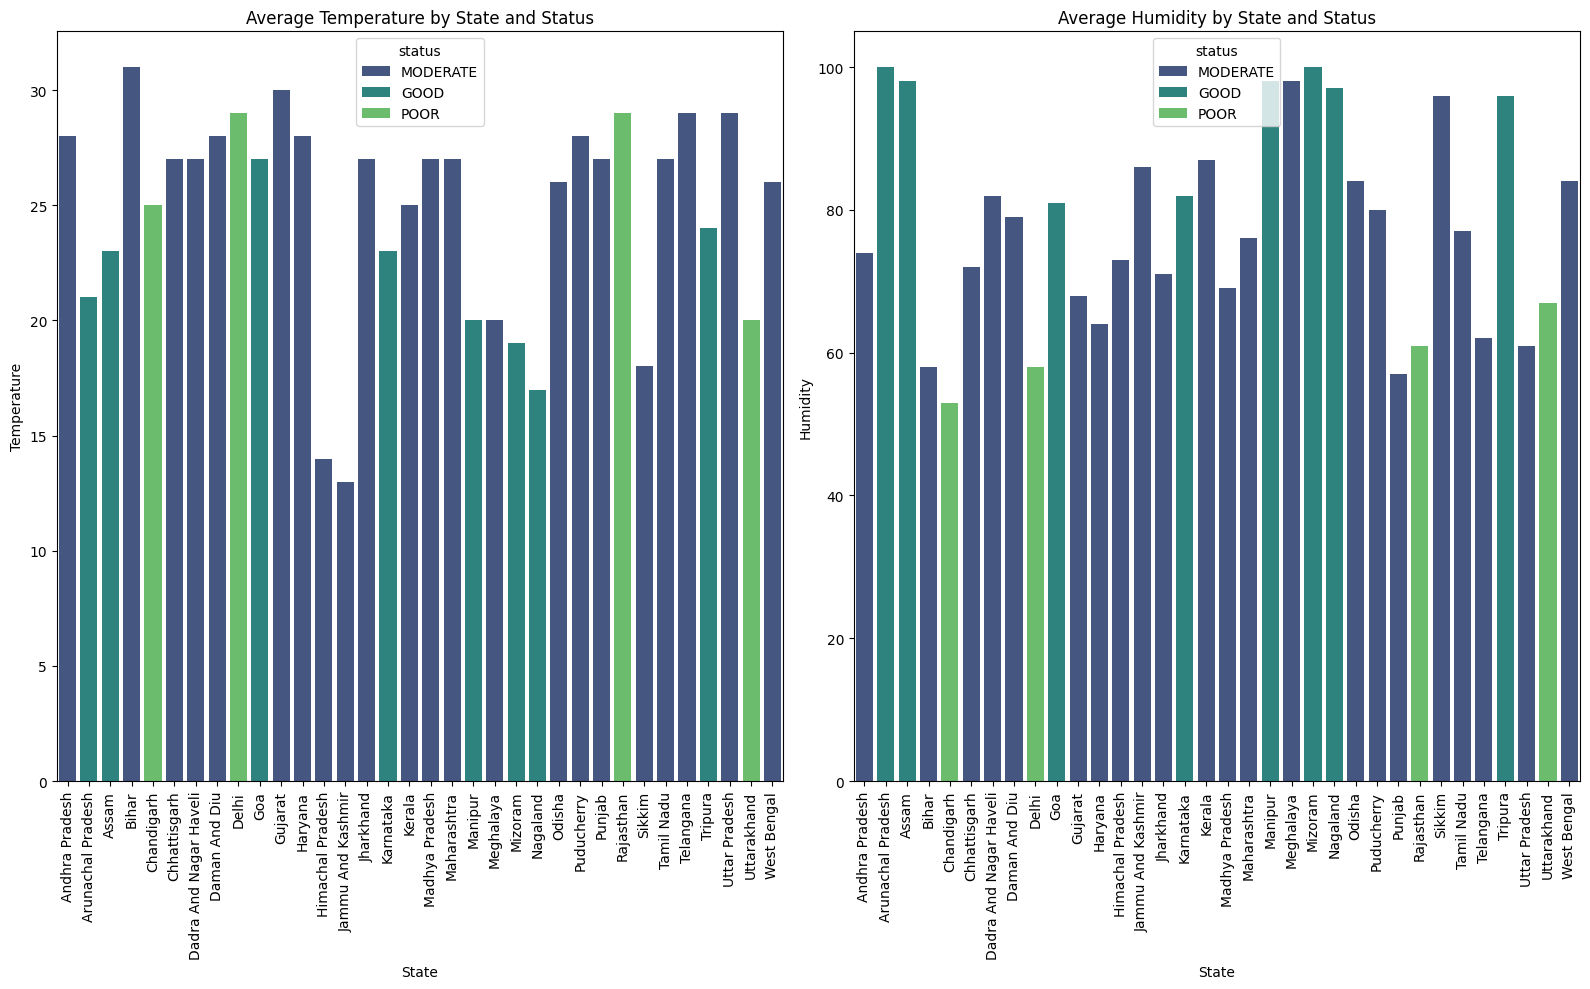

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'state' is included in your dataset
# Aggregate data by state and status
state_status_data = ev_pollution_data.groupby(['state', 'status']).agg({'Temp': 'mean', 'Humid': 'mean'}).reset_index()

plt.figure(figsize=(16, 10))

# Plot for Temperature
plt.subplot(1, 2, 1)
sns.barplot(data=state_status_data, x='state', y='Temp', hue='status', palette='viridis')
plt.title('Average Temperature by State and Status')
plt.xlabel('State')
plt.ylabel('Temperature')
plt.xticks(rotation=90)  # Rotate state names for better readability

# Plot for Humidity
plt.subplot(1, 2, 2)
sns.barplot(data=state_status_data, x='state', y='Humid', hue='status', palette='viridis')
plt.title('Average Humidity by State and Status')
plt.xlabel('State')
plt.ylabel('Humidity')
plt.xticks(rotation=90)  # Rotate state names for better readability

plt.tight_layout()
plt.show()


In [77]:
import pandas as pd

# Assuming ev_pollution_data is your DataFrame
top_5_per_status = ev_pollution_data.groupby('status').apply(lambda x: x.nlargest(5, 'AQI-US')).reset_index(drop=True)
print(top_5_per_status)


                state    status  AQI-US  PM2.5  PM10  Temp  Humid
0               Assam      GOOD      46     13    20    23     98
1           Karnataka      GOOD      40     10    29    23     82
2   Arunachal Pradesh      GOOD      39     11    17    21    100
3                 Goa      GOOD      30      8    20    27     81
4             Manipur      GOOD      28      7    12    20     98
5             Haryana  MODERATE     100     35    73    28     64
6       Uttar Pradesh  MODERATE      96     34    85    29     61
7               Bihar  MODERATE      87     28    53    31     58
8              Odisha  MODERATE      79     25    42    26     84
9           Jharkhand  MODERATE      78     22    52    27     71
10              Delhi      POOR     108     37   113    29     58
11        Uttarakhand      POOR     108     38    59    20     67
12         Chandigarh      POOR     107     38    49    25     53
13          Rajasthan      POOR     107     38    67    29     61


C:\Users\user\AppData\Local\Temp\ipykernel_2060\2135903339.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



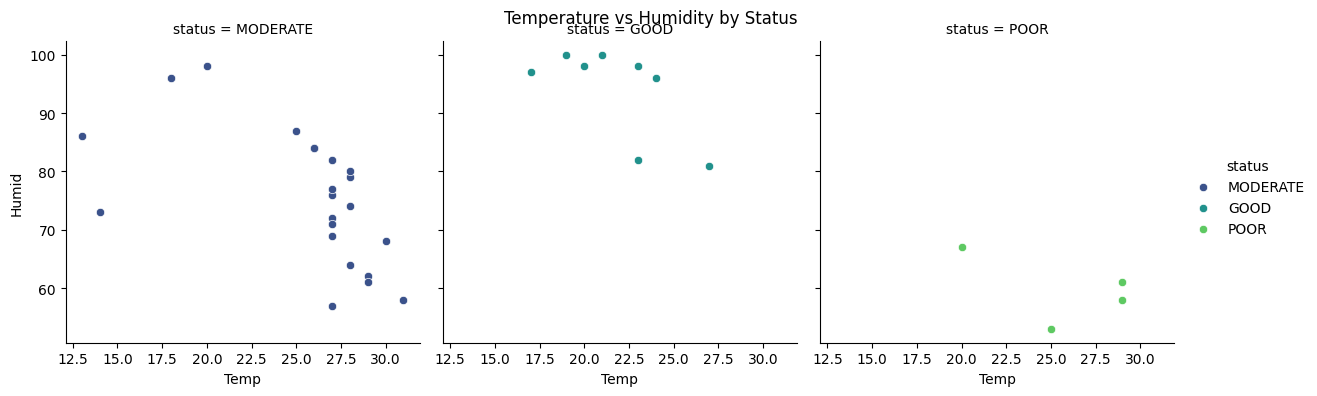

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ev_pollution_data is your DataFrame and 'status' is a column in it
g = sns.FacetGrid(ev_pollution_data, col='status', hue='status', palette='viridis', col_wrap=3, height=4)
g.map(sns.scatterplot, 'Temp', 'Humid')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temperature vs Humidity by Status')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_2060\863847842.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='No. of Operational PCS', data=charging_data, palette='Blues_d')
C:\Users\user\AppData\Local\Temp\ipykernel_2060\863847842.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='AQI-US', data=avg_pollution, palette='Reds_d')


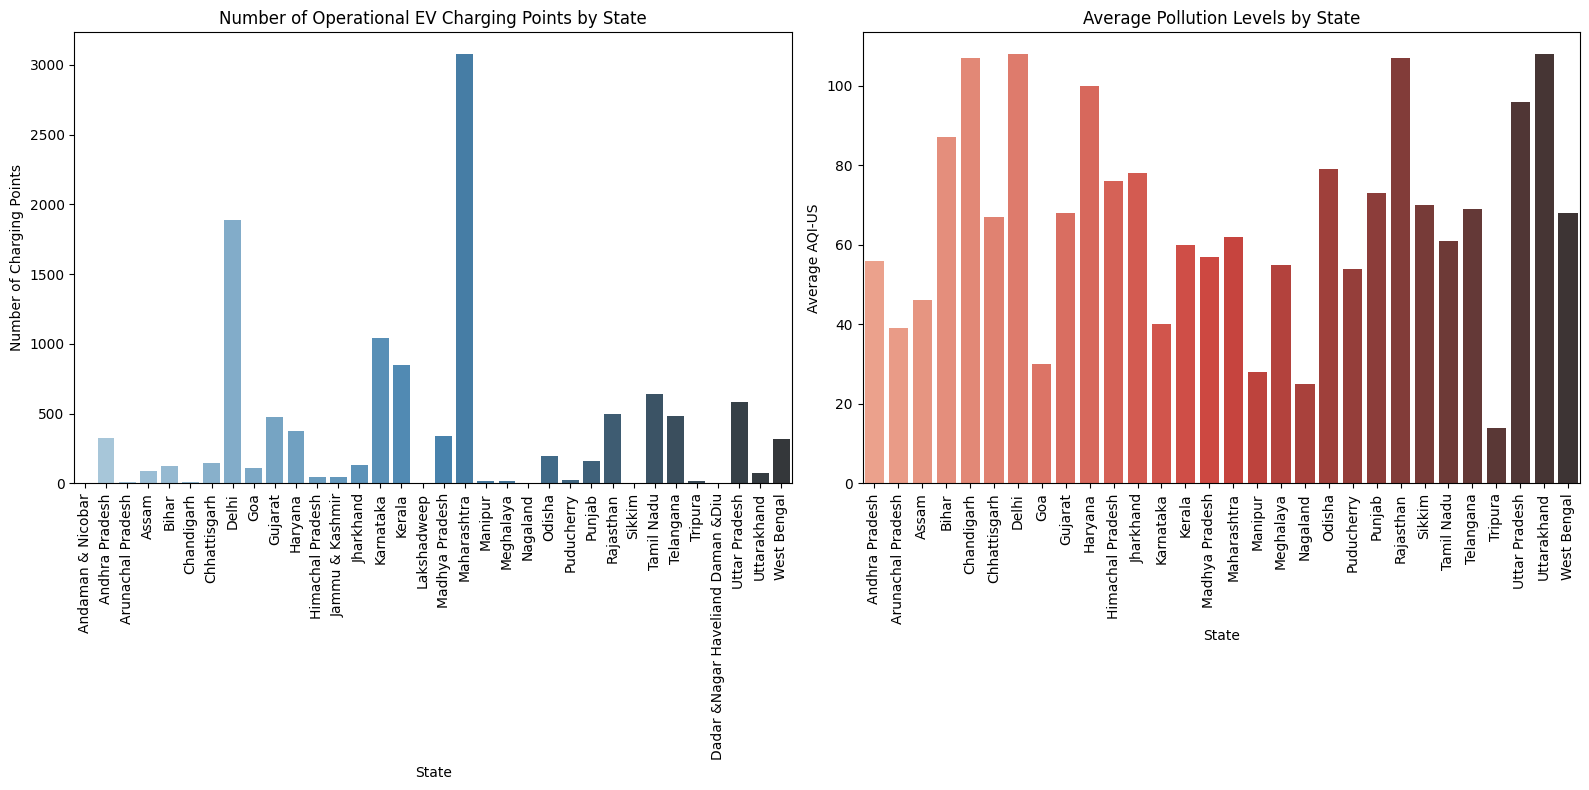

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
pollution_data = pd.read_csv('C:/Users/user/Documents/Internship/Project Data/pollution data.csv')
charging_data = pd.read_excel('C:/Users/user/Documents/Internship/Project Data/State wise operational Public EV Charging Stations.xlsx')

# Rename columns for merging
charging_data.rename(columns={'State Name': 'state'}, inplace=True)



# Merge DataFrames on 'state'
merged_data = pd.merge(pollution_data, charging_data, on='state')

# Clean Data (e.g., handle missing values if needed)
merged_data.dropna(inplace=True)

# Plotting
plt.figure(figsize=(16, 8))

# Bar plot for Number of Charging Points
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='No. of Operational PCS', data=charging_data, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Number of Operational EV Charging Points by State')
plt.xlabel('State')
plt.ylabel('Number of Charging Points')

# Bar plot for Average Pollution Levels
plt.subplot(1, 2, 2)
avg_pollution = merged_data.groupby('state')['AQI-US'].mean().reset_index()
sns.barplot(x='state', y='AQI-US', data=avg_pollution, palette='Reds_d')
plt.xticks(rotation=90)
plt.title('Average Pollution Levels by State')
plt.xlabel('State')
plt.ylabel('Average AQI-US')

plt.tight_layout()
plt.show()


Pollution Data:
                     state    status  AQI-US  PM2.5  PM10  Temp  Humid
0           Andhra Pradesh  MODERATE      56     16    31    28     74
1        Arunachal Pradesh      GOOD      39     11    17    21    100
2                    Assam      GOOD      46     13    20    23     98
3                    Bihar  MODERATE      87     28    53    31     58
4               Chandigarh      POOR     107     38    49    25     53
5             Chhattisgarh  MODERATE      67     20    46    27     72
6   Dadra And Nagar Haveli  MODERATE      62     16    35    27     82
7            Daman And Diu  MODERATE      61     16    33    28     79
8                    Delhi      POOR     108     37   113    29     58
9                      Goa      GOOD      30      8    20    27     81
10                 Gujarat  MODERATE      68     20    42    30     68
11                 Haryana  MODERATE     100     35    73    28     64
12        Himachal Pradesh  MODERATE      76     21    46    

C:\Users\user\AppData\Local\Temp\ipykernel_2060\2991049553.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\user\AppData\Local\Temp\ipykernel_2060\2991049553.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




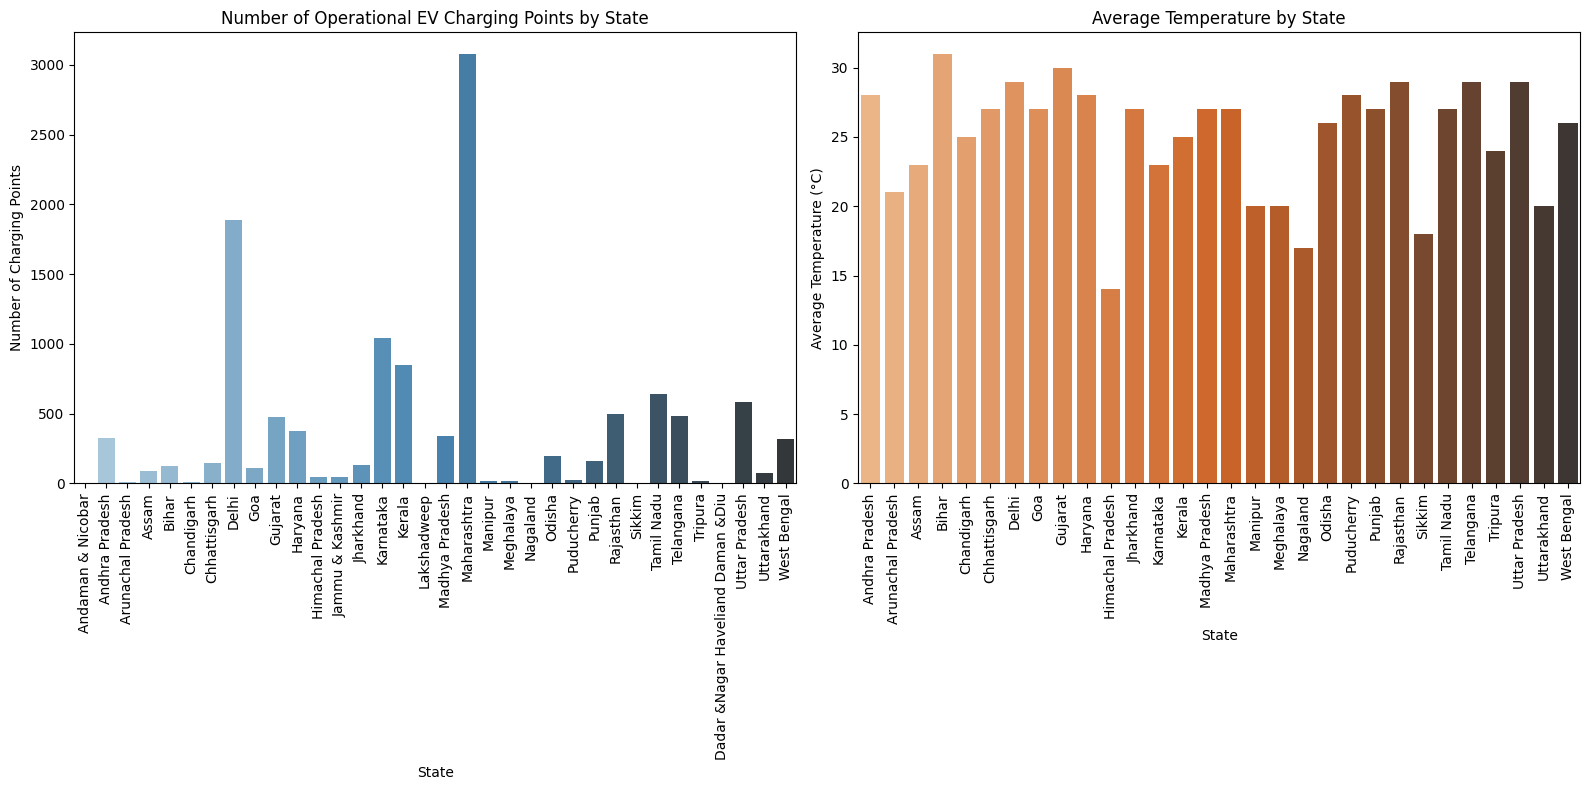

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
pollution_data = pd.read_csv('C:/Users/user/Documents/Internship/Project Data/pollution data.csv')
charging_data = pd.read_excel('C:/Users/user/Documents/Internship/Project Data/State wise operational Public EV Charging Stations.xlsx')

# Rename columns for merging
charging_data.rename(columns={'State Name': 'state'}, inplace=True)

# Display individual data
print("Pollution Data:")
print(pollution_data)

print("\nCharging Data:")
print(charging_data)

# Merge DataFrames on 'state'
merged_data = pd.merge(pollution_data, charging_data, on='state')

# Clean Data (e.g., handle missing values if needed)
merged_data.dropna(inplace=True)

# Plotting
plt.figure(figsize=(16, 8))

# Bar plot for Number of Charging Points
plt.subplot(1, 2, 1)
sns.barplot(x='state', y='No. of Operational PCS', data=charging_data, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Number of Operational EV Charging Points by State')
plt.xlabel('State')
plt.ylabel('Number of Charging Points')

# Bar plot for Average Temperature Levels
plt.subplot(1, 2, 2)
avg_temp = merged_data.groupby('state')['Temp'].mean().reset_index()
sns.barplot(x='state', y='Temp', data=avg_temp, palette='Oranges_d')
plt.xticks(rotation=90)
plt.title('Average Temperature by State')
plt.xlabel('State')
plt.ylabel('Average Temperature (°C)')

plt.tight_layout()
plt.show()


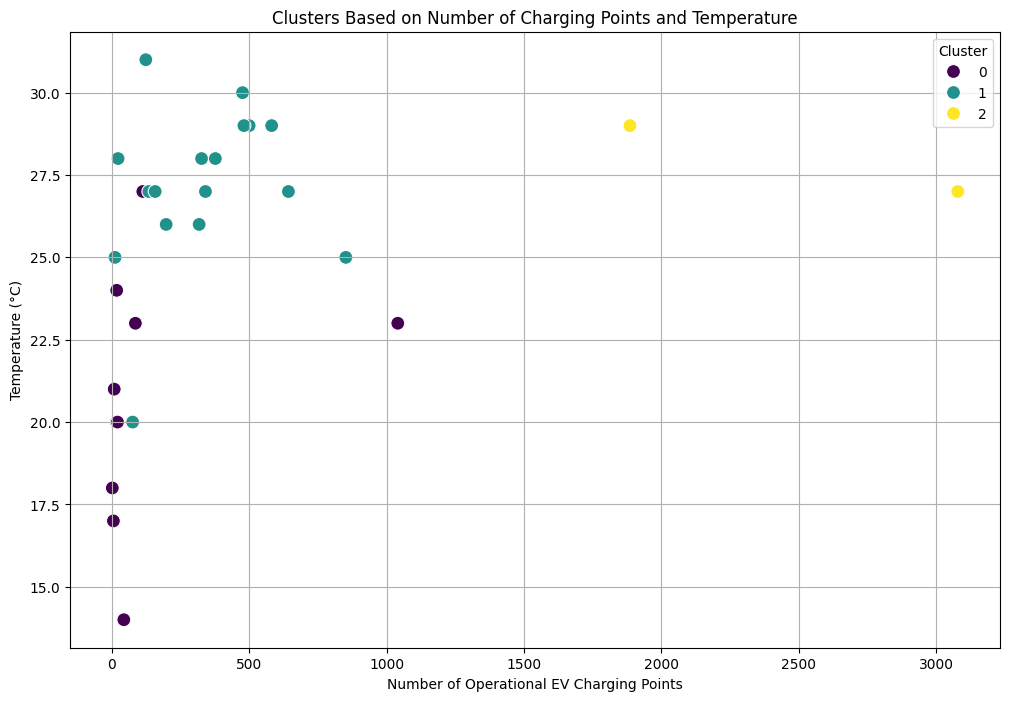

In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
pollution_data = pd.read_csv('C:/Users/user/Documents/Internship/Project Data/pollution data.csv')
charging_data = pd.read_excel('C:/Users/user/Documents/Internship/Project Data/State wise operational Public EV Charging Stations.xlsx')

# Rename columns for merging
charging_data.rename(columns={'State Name': 'state'}, inplace=True)

# Merge DataFrames on 'state'
merged_data = pd.merge(pollution_data, charging_data, on='state')

# Clean Data
merged_data.dropna(inplace=True)

# Prepare data for clustering
features = merged_data[['No. of Operational PCS', 'Temp', 'AQI-US']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
merged_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='No. of Operational PCS', y='Temp', hue='Cluster', data=merged_data, palette='viridis', s=100)
plt.title('Clusters Based on Number of Charging Points and Temperature')
plt.xlabel('Number of Operational EV Charging Points')
plt.ylabel('Temperature (°C)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_2060\2956056876.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\user\AppData\Local\Temp\ipykernel_2060\2956056876.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




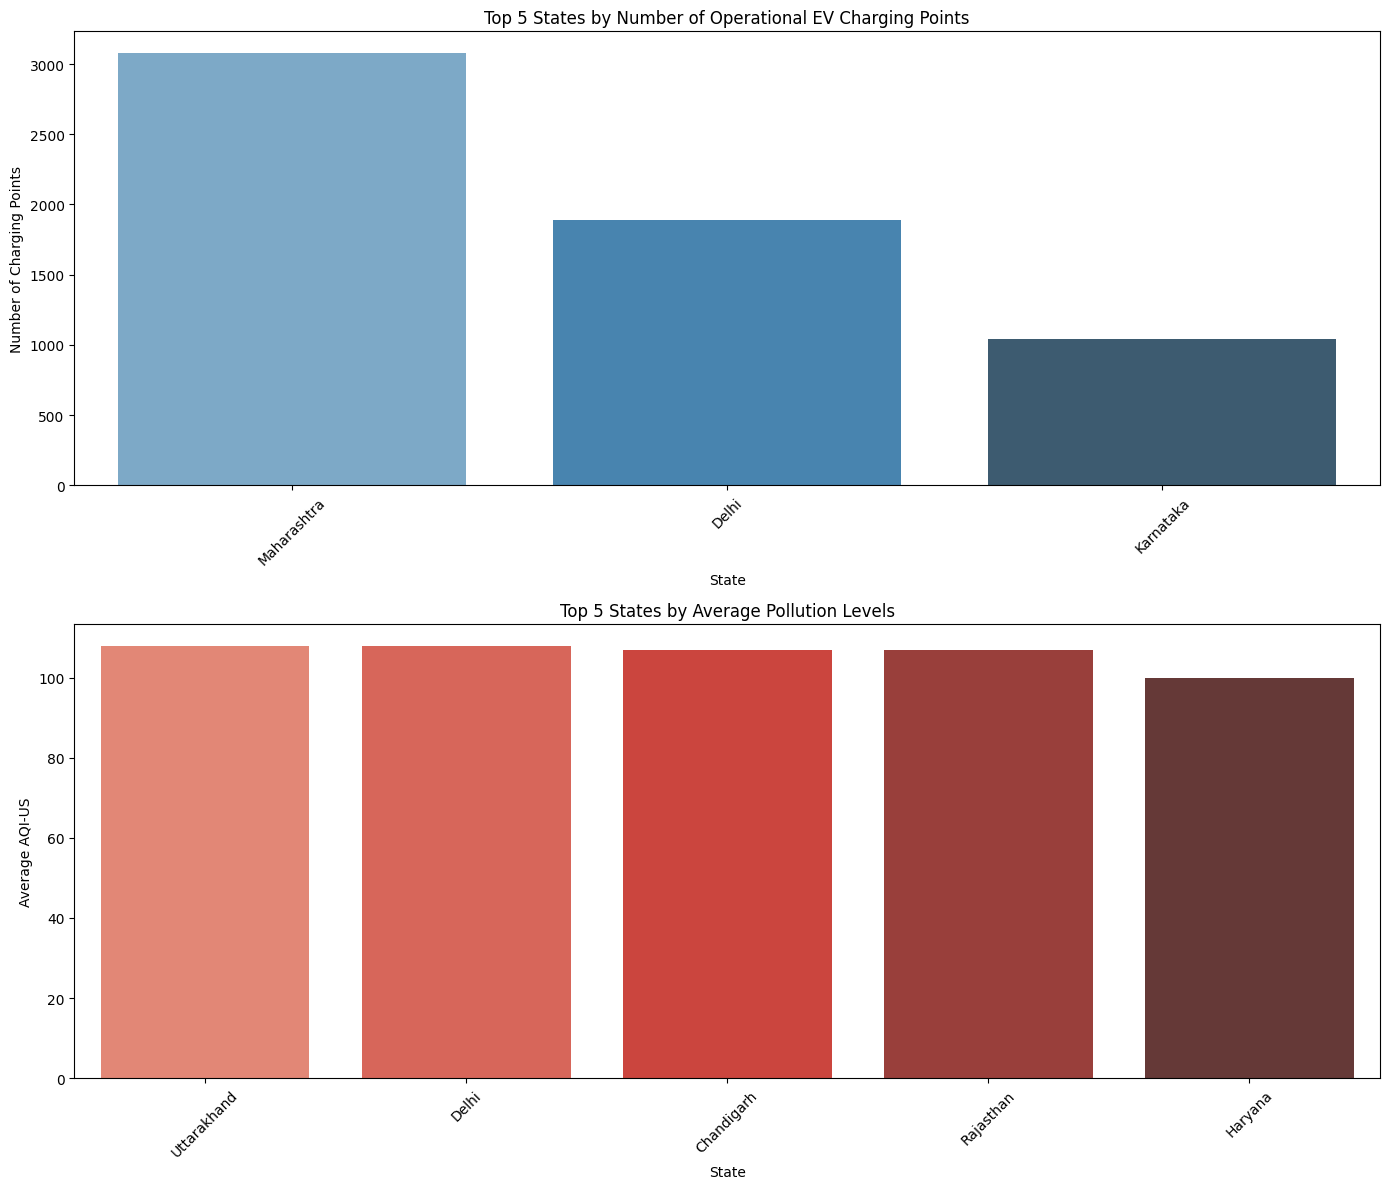

In [70]:
# Get top 5 states by number of charging points
top_charging_points = charging_data.sort_values(by='No. of Operational PCS', ascending=False).head(5)

# Get top 5 states by average pollution levels
top_pollution = merged_data.groupby('state')['AQI-US'].mean().reset_index()
top_pollution = top_pollution.sort_values(by='AQI-US', ascending=False).head(5)

# Plotting
plt.figure(figsize=(14, 12))

# Bar plot for Top 5 Charging Points
plt.subplot(2, 1, 1)
sns.barplot(x='state', y='No. of Operational PCS', data=top_charging_points, palette='Blues_d')
plt.title('Top 5 States by Number of Operational EV Charging Points')
plt.xlabel('State')
plt.ylabel('Number of Charging Points')
plt.xticks(rotation=45)

# Bar plot for Top 5 Pollution Levels
plt.subplot(2, 1, 2)
sns.barplot(x='state', y='AQI-US', data=top_pollution, palette='Reds_d')
plt.title('Top 5 States by Average Pollution Levels')
plt.xlabel('State')
plt.ylabel('Average AQI-US')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_2060\3272961011.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Arunachal Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Delhi'),
  Text(7, 0, 'Goa'),
  Text(8, 0, 'Gujarat'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Himachal Pradesh'),
  Text(11, 0, 'Jharkhand'),
  Text(12, 0, 'Karnataka'),
  Text(13, 0, 'Kerala'),
  Text(14, 0, 'Madhya Pradesh'),
  Text(15, 0, 'Maharashtra'),
  Text(16, 0, 'Manipur'),
  Text(17, 0, 'Meghalaya'),
  Text(18, 0, 'Nagaland'),
  Text(19, 0, 'Odisha'),
  Text(20, 0, 'Puducherry'),
  Text(21, 0, 'Punjab'),
  Text(22, 0, 'Rajasthan'),
  Text(23, 0, 'Sikkim'),
  Text(24, 0, 'Tamil Nadu'),
  Text(25, 0, 'Telangana'),
  Text(26, 0, 'Tripura'),
  Text(27, 0, 'Uttar Pradesh'),
  Text(28, 0, 'Uttarakhand'),
  Text(29, 0, 'West Bengal'

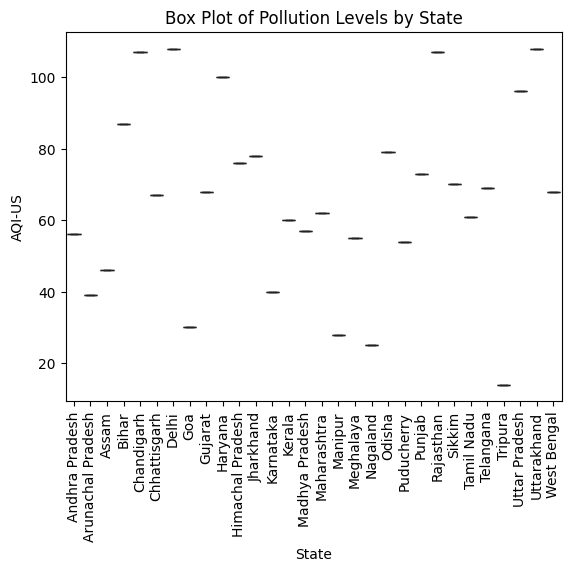

In [68]:
# Box Plot for Pollution Levels
plt.subplot(1, 1, 1)
sns.boxplot(x='state', y='AQI-US', data=merged_data, palette='Reds_d')
plt.title('Box Plot of Pollution Levels by State')
plt.xlabel('State')
plt.ylabel('AQI-US')
plt.xticks(rotation=90)
